In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [32]:
df= pd.read_csv('incomenum.csv')

In [33]:
#preprocessing not needed for this dataset since it is already cleaned.
#Since we have already used this dataset before , we will skip df.head(), df.columns, df.describe(), and the value counts

#Get the feature columns and the label column
X = df.drop(columns= ['income_>50K'], inplace = False) # feature columns are all columns except the Label column
y = df['income_>50K']

In [34]:
# Split the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

In [35]:
#Initialize classifiers untrain models
dt_model = DecisionTreeClassifier(random_state=30)
rf_model = RandomForestClassifier(random_state=30)
gb_model = GradientBoostingClassifier(random_state=30)

In [36]:
#train the models by calling method fit
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=30)

In [37]:
#make predictions using X_test as the input
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

In [38]:
#Confusion Metrics comparison
print("Decision Tree confusion matrix:\n", confusion_matrix(y_test, dt_pred))
print("Random Forest confusion matrix:\n", confusion_matrix(y_test, rf_pred))
print("Gradient Boosting confusion matrix:\n",confusion_matrix(y_test, gb_pred))  

Decision Tree confusion matrix:
 [[6548  916]
 [ 865 1440]]
Random Forest confusion matrix:
 [[6969  495]
 [ 892 1413]]
Gradient Boosting confusion matrix:
 [[7087  377]
 [ 925 1380]]


In [39]:
#Decision Tree performance metrics
print("Decision Tree's Accuracy: ", accuracy_score(y_test, dt_pred))
print("Decision Tree's precision score: ", precision_score(y_test, dt_pred))
print("Decision Tree's recall:", recall_score(y_test, dt_pred))
print("Decsision Tree's f1_score:", f1_score(y_test, dt_pred))

Decision Tree's Accuracy:  0.8176886068174839
Decision Tree's precision score:  0.6112054329371817
Decision Tree's recall: 0.6247288503253796
Decsision Tree's f1_score: 0.6178931559751126


In [40]:
#Random Forest performance metrics
print("Random Forest's Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest's precision score:", precision_score(y_test, rf_pred))
print("Random Forest's recall:", recall_score(y_test, rf_pred))
print("random Forest's f1_score:",f1_score(y_test,rf_pred))

Random Forest's Accuracy: 0.8580202681953117
Random Forest's precision score: 0.7405660377358491
Random Forest's recall: 0.6130151843817787
random Forest's f1_score: 0.6707809162117256


In [41]:
#Gradient Boost performance metrics
print("Gradient Boost's Accuracy:", accuracy_score(y_test, gb_pred))
print("Gradient Boost's precision score:", precision_score(y_test, gb_pred))
print("Gradient Boost's recall:", recall_score(y_test, gb_pred))
print("Gradient Boost's f1_score:",f1_score(y_test,gb_pred))

Gradient Boost's Accuracy: 0.8667212611321528
Gradient Boost's precision score: 0.7854297097324986
Gradient Boost's recall: 0.5986984815618221
Gradient Boost's f1_score: 0.6794682422451994


In [42]:
dt_probs = dt_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]
gb_probs = gb_model.predict_proba(X_test)[:, 1]

In [45]:
#Compute ROC Curve and AUC for each classifier
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_probs)

In [46]:
#Compute AUC

auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)
auc_gb = auc(fpr_gb, tpr_gb)

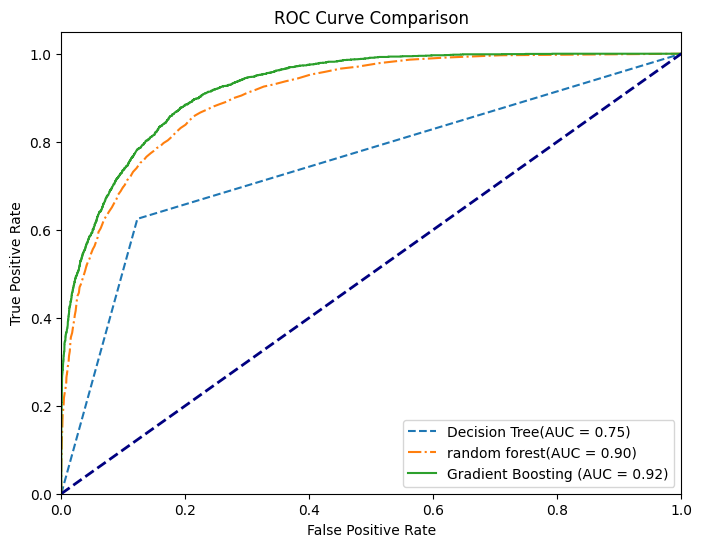

In [47]:
#plot the ROC AUC Curves
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label = f'Decision Tree(AUC = {auc_dt:.2f})', linestyle='--')
plt.plot(fpr_rf, tpr_rf, label=f'random forest(AUC = {auc_rf:.2f})', linestyle='-.')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.2f})', linestyle='-')

#Diagonal line for reference (random model)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc= "lower right")